<a href="https://colab.research.google.com/github/sadamhabnawi28/gravitational_wave_project/blob/main/GW_data_Processing_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import library and data

In [ ]:
# -- Uncomment following line if running in Google Colab
! pip install -q 'gwpy==3.0.8'
! pip install -q 'gwosc==0.7.1'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [1]:
! pip install -q PyCBC==2.4.0 lalsuite==7.21

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 1.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 24.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... canceled
ERROR: Operation cancelled by user


In [ ]:
#! pip install -q dynesty==2.1.2 corner==2.2.2

In [ ]:
# ! pip install -q bilby==2.2.2

In [ ]:
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import gwpy
#import gwosc
#from gwosc.datasets import find_datasets
#from gwosc.locate import get_event_urls
#from gwosc.datasets import event_gps

import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from scipy.signal import get_window

import bilby
from bilby.core.prior import Uniform, PowerLaw
from bilby.gw.conversion import convert_to_lal_binary_black_hole_parameters, generate_all_bbh_parameters

In [ ]:
path='/content/drive/MyDrive/Astronomy data/Gw/'

# Open the HDF5 file in read mode
#with h5py.File(path+'H-H1_GWOSC_4KHZ_R1-1239082247-32.hdf5', 'r') as file:
    # List all groups and datasets in the file
    #def print_attrs(name, obj):
        #print(name, dict(obj.attrs))
    #file.visititems(print_attrs)

In [ ]:
with h5py.File(path +'H-H1_GWOSC_4KHZ_R1-1239082247-32.hdf5') as file:
    # Access a specific dataset
    H1_strain_dataset = file['strain/Strain']  # Adjust the path to your dataset
    try:
        print(f"Dataset shape: {H1_strain_dataset.shape}")
        print(f"Dataset dtype: {H1_strain_dataset.dtype}")
    except Exception as error:
        print('error :', error)
    # Read the data into a NumPy array
    try:
        H1_strain = H1_strain_dataset[:]
        print(H1_strain)
        print(H1_strain_dataset)
    except Exception as error:
        print('error :' , error)

Dataset shape: (131072,)
Dataset dtype: float64
error : name 'strain' is not defined


In [ ]:
with h5py.File(path +'L-L1_GWOSC_4KHZ_R1-1239082247-32.hdf5') as file:
    # Access a specific dataset
    L1_strain_dataset = file['strain/Strain']  # Adjust the path to your dataset
    try:
        print(f"Dataset shape: {L1_strain_dataset.shape}")
        print(f"Dataset dtype: {L1_strain_dataset.dtype}")
    except Exception as error:
        print('error :', error)
    # Read the data into a NumPy array
    try:
        L1_strain = L1_strain_dataset[:]
        print(L1_strain)
        print(L1_strain_dataset)
    except Exception as error:
        print('error :' , error)

Dataset shape: (131072,)
Dataset dtype: float64
error : name 'strain' is not defined


In [ ]:
with h5py.File(path +'V-V1_GWOSC_4KHZ_R1-1239082247-32.hdf5') as file:
    # Access a specific dataset
    V1_strain_dataset = file['strain/Strain']  # Adjust the path to your dataset
    try:
        print(f"Dataset shape: {V1_strain_dataset.shape}")
        print(f"Dataset dtype: {V1_strain_dataset.dtype}")
    except Exception as error:
        print('error :', error)
    # Read the data into a NumPy array
    try:
        V1_strain = strain_dataset[:]
        print(V1_strain)
        print(V1_strain_dataset)
    except Exception as error:
        print('error :' , error)

Dataset shape: (131072,)
Dataset dtype: float64
error : name 'strain' is not defined


In [ ]:

t0= int(1239082247.0)
fs = 4096
#t1 = fs*(int(event_gps('GW190412'))-t0 - 5)
#tn = fs*(int(event_gps('GW190412'))-t0 + 5)
#N = (tn-t1)

#Time domain

In [ ]:
# convert into gw timeseries object
from gwpy.timeseries import TimeSeries as ts
H1_ts =ts(strain,sample_rate=4096,t0= 1239082247,channel='H1')
print(H1_ts)

TimeSeries([-4.25051950e-19, -4.15926809e-19, -4.17901344e-19,
            ...,  3.91721704e-20,  4.41533042e-20,
             4.54920331e-20]
           unit: dimensionless,
           t0: 1239082247.0 s,
           dt: 0.000244140625 s,
           name: None,
           channel: H1)


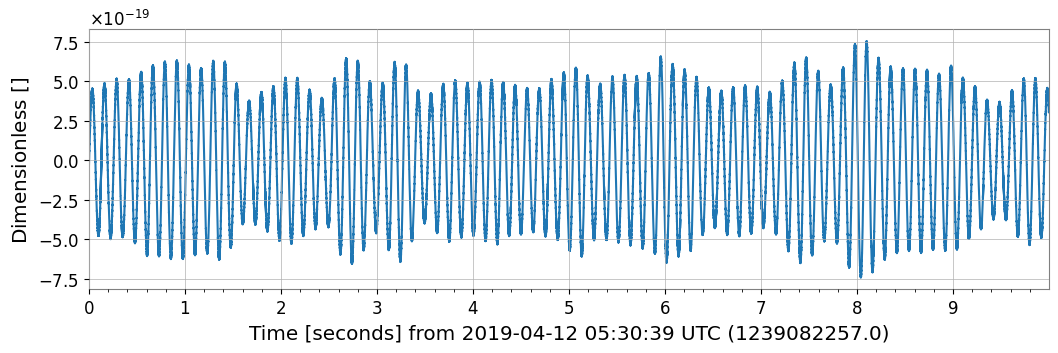

In [ ]:
plot = H1_ts[t1:tn].plot()
plt.show()

#Frequency domain

##FFT

In [ ]:
from scipy.signal import get_window
# Choose a window function
window = get_window('hann', N)
# Apply the window to the signal
windowed_signal = H1_ts[t1:tn] * window

freq_series= windowed_signal.fft()
freq_series = freq_series.abs()
freq_series

<FrequencySeries([1.23655481e-25, 2.47542187e-25, 2.48439399e-25,
                  ..., 1.71561356e-26, 3.91628410e-26,
                  4.41687820e-26]
                 unit=Unit(dimensionless),
                 f0=<Quantity 0. Hz>,
                 df=<Quantity 0.1 Hz>,
                 epoch=<Time object: scale='utc' format='gps' value=1239082257.0>,
                 name=None,
                 channel=<Channel("H1", None) at 0x78e30a41f160>)>

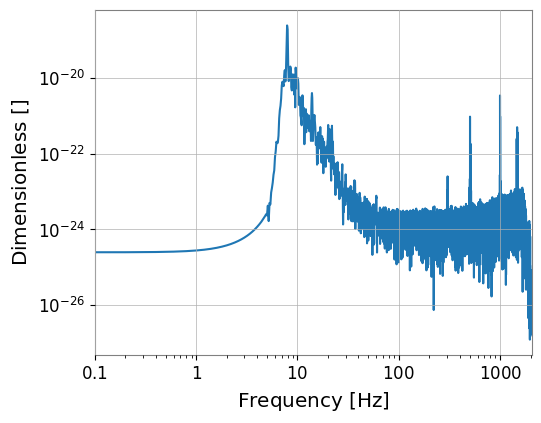

In [ ]:
fft_plot = freq_series.plot(yscale='log')
plt.show()

## PSD

In [ ]:
psd = H1_ts[t1:tn].psd(fftlength=2)
psd

<FrequencySeries([1.78104990e-41, 8.69711245e-42, 6.39399610e-46,
                  ..., 7.01560351e-51, 8.26567466e-51,
                  6.01095441e-51]
                 unit=Unit("1 / Hz"),
                 f0=<Quantity 0. Hz>,
                 df=<Quantity 0.5 Hz>,
                 epoch=<Time object: scale='utc' format='gps' value=1239082257.0>,
                 name=None,
                 channel=<Channel("H1", None) at 0x7bcbd22a4f10>)>

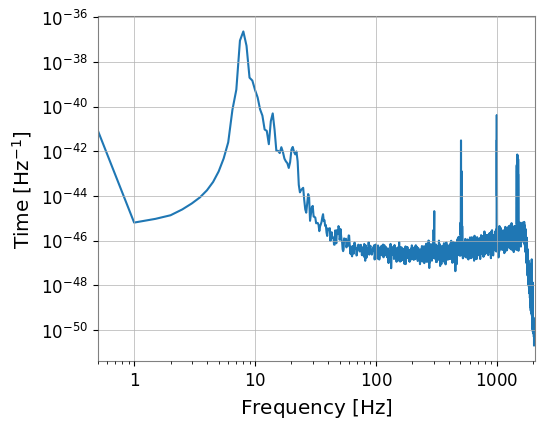

In [ ]:
psd_plot=psd.plot()
plt.show()

##ASD

In [ ]:
asd = H1_ts[t1:tn].asd(fftlength=2)
asd

<FrequencySeries([4.22024869e-21, 2.94908671e-21, 2.52863523e-23,
                  ..., 8.37591995e-26, 9.09157558e-26,
                  7.75303451e-26]
                 unit=Unit("1 / Hz(1/2)"),
                 f0=<Quantity 0. Hz>,
                 df=<Quantity 0.5 Hz>,
                 epoch=<Time object: scale='utc' format='gps' value=1239082257.0>,
                 name=None,
                 channel=<Channel("H1", None) at 0x78e30a41f160>)>

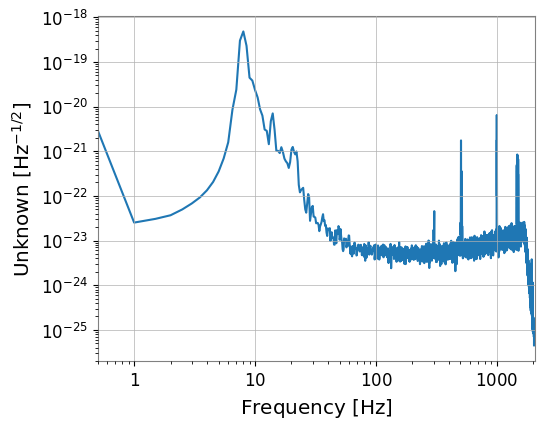

In [ ]:
asd_plot=asd.plot()
plt.show()

#Spectogram & Q-Transform

##Spectogram

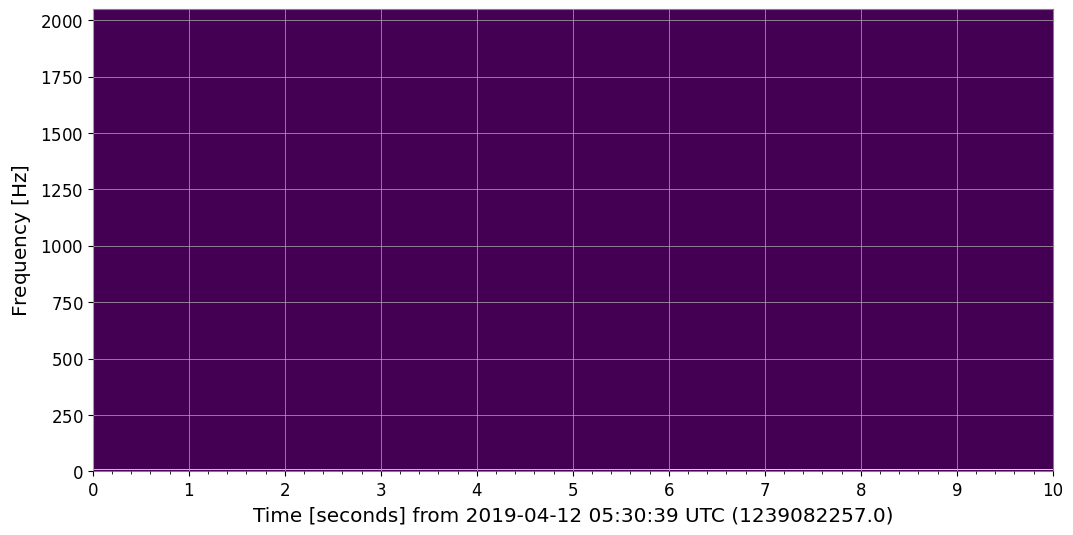

In [ ]:
specgram = H1_ts[t1:tn].spectrogram2(fftlength=4, overlap=2, window='hann') ** (1/2.)
plot = specgram.plot()

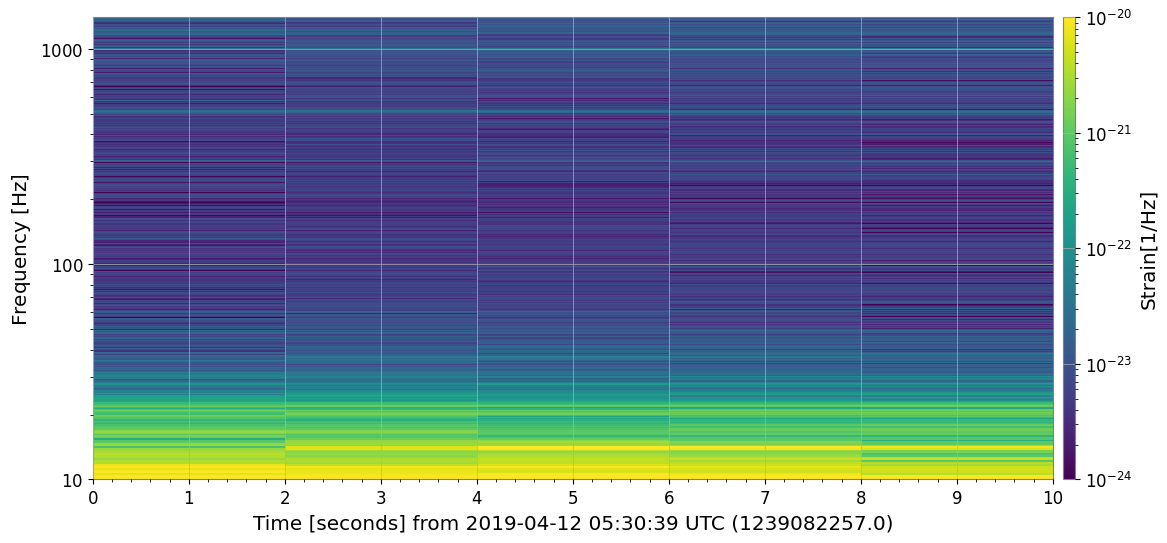

In [ ]:
ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim((10,1400))
ax.colorbar(clim=(1e-24,1e-20),norm='log',label='Strain[1/Hz]')
plot

##Q-Transform

In [ ]:
qH1_ts=H1_ts[t1:tn].q_transform(frange=(30,300),
                                qrange=(4,80),
                                outseg=(event_gps('GW190412')-0.2,event_gps('GW190412')+0.3))

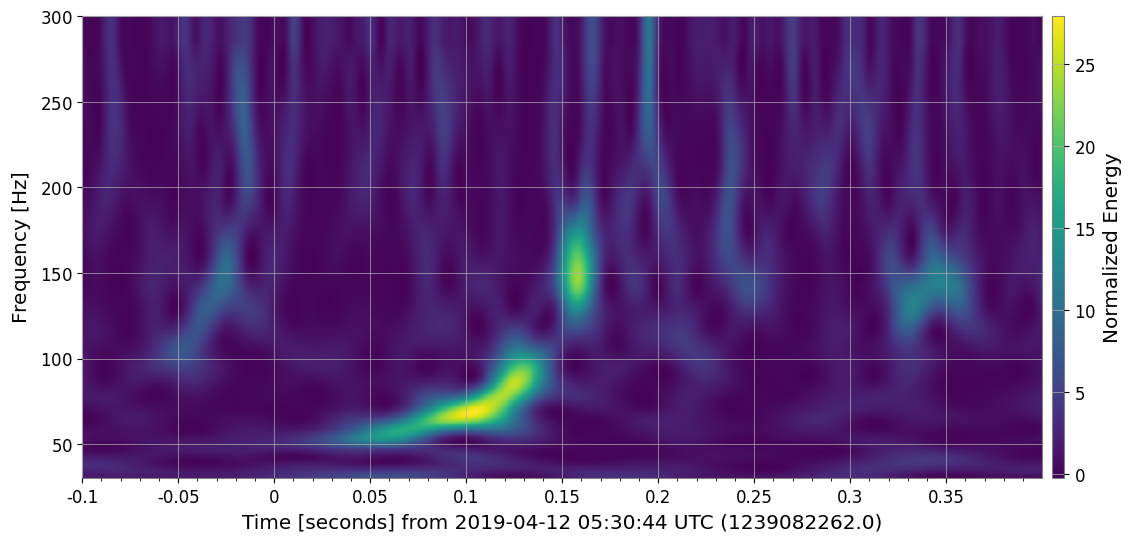

In [ ]:
qtrans= qH1_ts.plot()
qtrans.colorbar(label='Normalized Energy')

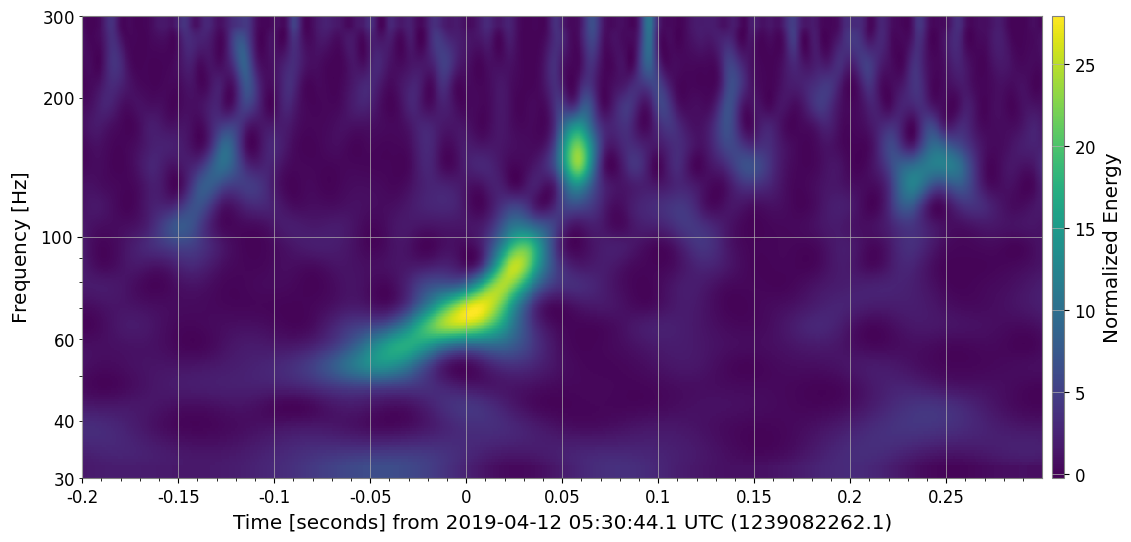

In [ ]:
bx = qtrans.gca()
bx.set_epoch(event_gps('GW190412'))
bx.set_ylim(30, 300)
bx.set_yscale("log")
qtrans  # refresh

# Generating Waveform

In [ ]:
from pycbc.waveform import get_td_waveform, get_fd_waveform
from pycbc.waveform import td_approximants, fd_approximants

# List of td approximants that are available
print('Time domain waveforms: ', td_approximants())

# List of fd approximants that are currently available
print('Frequency domain waveforms: ', fd_approximants())

Time domain waveforms:  ['TaylorT1', 'TaylorT2', 'TaylorT3', 'SpinTaylorT1', 'SpinTaylorT4', 'SpinTaylorT5', 'PhenSpinTaylor', 'PhenSpinTaylorRD', 'EOBNRv2', 'EOBNRv2HM', 'TEOBResum_ROM', 'SEOBNRv1', 'SEOBNRv2', 'SEOBNRv2_opt', 'SEOBNRv3', 'SEOBNRv3_pert', 'SEOBNRv3_opt', 'SEOBNRv3_opt_rk4', 'SEOBNRv4', 'SEOBNRv4_opt', 'SEOBNRv4P', 'SEOBNRv4PHM', 'SEOBNRv2T', 'SEOBNRv4T', 'SEOBNRv4_ROM_NRTidalv2', 'SEOBNRv4_ROM_NRTidalv2_NSBH', 'HGimri', 'IMRPhenomA', 'IMRPhenomB', 'IMRPhenomC', 'IMRPhenomD', 'IMRPhenomD_NRTidalv2', 'IMRPhenomNSBH', 'IMRPhenomHM', 'IMRPhenomPv2', 'IMRPhenomPv2_NRTidal', 'IMRPhenomPv2_NRTidalv2', 'TaylorEt', 'TaylorT4', 'EccentricTD', 'SpinDominatedWf', 'NR_hdf5', 'NRSur7dq2', 'NRSur7dq4', 'SEOBNRv4HM', 'NRHybSur3dq8', 'IMRPhenomXAS', 'IMRPhenomXHM', 'IMRPhenomPv3', 'IMRPhenomPv3HM', 'IMRPhenomXP', 'IMRPhenomXPHM', 'TEOBResumS', 'IMRPhenomT', 'IMRPhenomTHM', 'IMRPhenomTP', 'IMRPhenomTPHM', 'SEOBNRv4HM_PA', 'pSEOBNRv4HM_PA', 'IMRPhenomXAS_NRTidalv2', 'IMRPhenomXP_NRTidal

In [ ]:
# generate time domain waveform for + and × polarization
m1,m2 = 30,10
hp, hc = get_td_waveform(approximant="SEOBNRv4HM_PA",
                         mass1=m1,
                         mass2=m2,
                         delta_t=1.0/fs,
                         f_lower=20,
                         distance= 740)

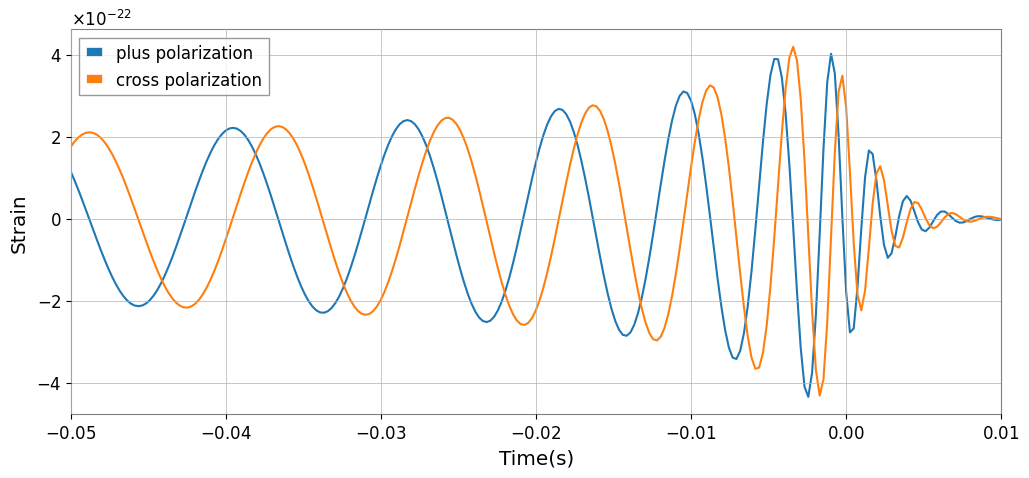

In [ ]:
#plotting waveform

plt.figure(figsize=(12,5))
plt.plot(hp.sample_times, hp,label='plus polarization')
plt.plot(hc.sample_times, hc, label='cross polarization')
plt.xlim((-0.05,0.01))
plt.xlabel('Time(s)')
plt.ylabel('Strain')
plt.legend()
plt.show()

In [ ]:
fft_hp, fft_hc = get_fd_waveform(approximant="IMRPhenomD",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/16384,
                         f_lower=30,
                        delta_f=1.)

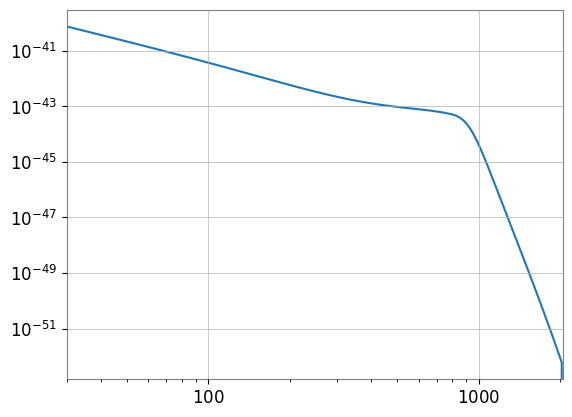

In [ ]:
plt.plot(fft_hp.sample_frequencies, fft_hp.squared_norm())
plt.xscale('log')
plt.yscale('log')
plt.xlim((30,2048))
plt.show()

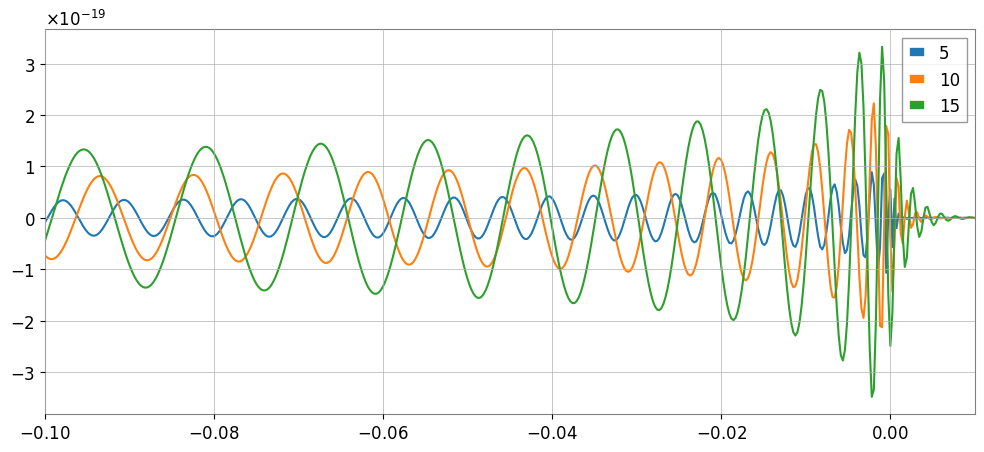

In [ ]:
#plotting waveforms with different mass ratios
plt.figure(figsize=(12,5))
for m in [5,10,15]:
    hp,hc= get_td_waveform(approximant="IMRPhenomD",
                           mass1=m,
                           mass2=m,
                           delta_t=1.0/4096,
                           f_lower=30)
    plt.plot(hp.sample_times, hp,label=f'{m}')
plt.xlim((-0.1,0.01))
plt.legend()
plt.show()

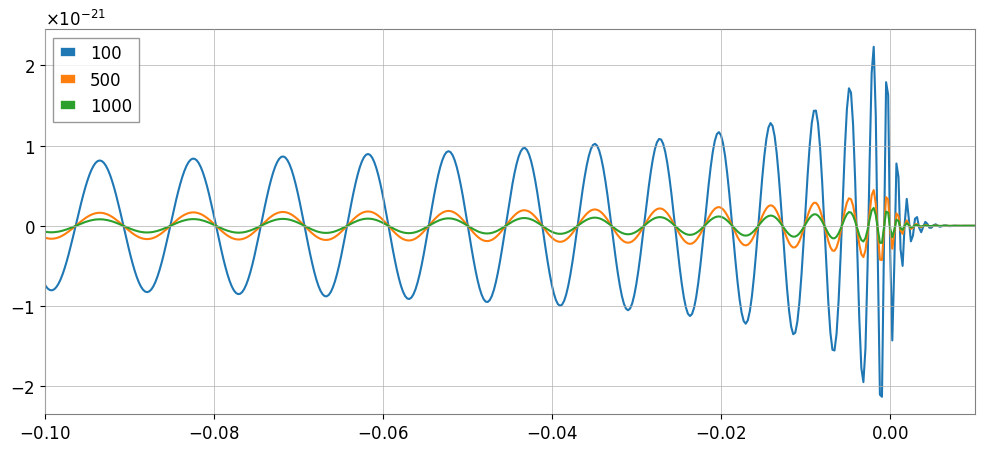

In [ ]:
#plotting waveforms with different distances
plt.figure(figsize=(12,5))
for d in [100,500,1000]:
    hp,hc= get_td_waveform(approximant="IMRPhenomD",
                           mass1=10,
                           mass2=10,
                           delta_t=1.0/4096,
                           f_lower=30,
                           distance=d)
    plt.plot(hp.sample_times, hp, label=f'{d}')
plt.xlim((-0.1,0.01))
plt.legend()
plt.show()

#Matched Filtering

In [ ]:
from pycbc.types import TimeSeries

ts = {'H1': H1_strain, 'L1':L1_strain, 'V1':V1_strain}
strain_list = [] # Create a list to store TimeSeries objects
for i in range(len(ts.keys())):
    strain_list.append(TimeSeries(ts.get(list(ts.keys())[i]), delta_t=1/fs)) # Append each TimeSeries to the list

In [ ]:
a = {"a": 1, "b": 2, "c":3}

In [ ]:
a["a"]= float(a["a"])
a["a"]

1.0

In [ ]:
from pycbc.filter import lowpass,highpass
for i in range(3):
    strain_list[i]=highpass(strain_list[i],45).crop(2,2)

In [ ]:
#plt.figure(figsize=(13,5))
#for i in range(3):
    #plt.plot(strain_list[i].sample_times,strain_list[i],label=f'{list(ts.keys())[i]}')
#plt.xlabel(f'Time(s) start from {t0} GPS time')
#plt.ylabel('Strain')
#plt.legend()
#plt.show()

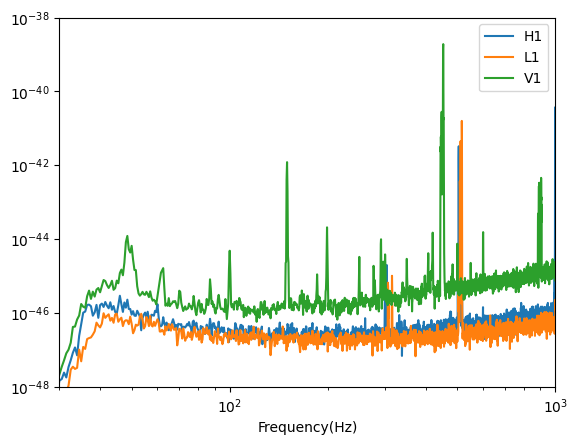

In [ ]:
# make psd
psd = []
for i in range(3):
    psd.append(strain_list[i].psd(2))
    plt.plot(psd[i].sample_frequencies,psd[i],label=f'{list(ts.keys())[i]}')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Frequency(Hz)')
plt.xlim((30,1000))
plt.ylim((1e-48,1e-38))
plt.legend()
plt.show()

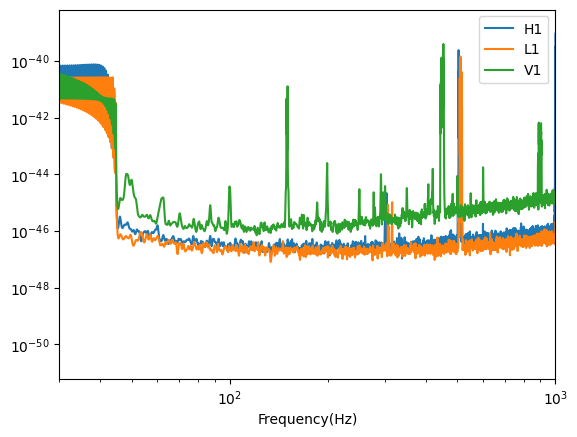

In [ ]:
#psd interpolation and truncation
from pycbc.psd import interpolate, inverse_spectrum_truncation

for i in range(3):
    psd[i] = interpolate(psd[i], strain_list[i].delta_f)
    psd[i] = inverse_spectrum_truncation(psd[i],
                                         int(2*strain_list[i].sample_rate),
                                         low_frequency_cutoff= 45)
    plt.plot(psd[i].sample_frequencies, psd[i], label=f'{list(ts.keys())[i]}')
plt.yscale('log')
plt.xscale('log')
plt.xlim((30,1000))
plt.xlabel('Frequency(Hz)')
plt.legend()
plt.show()

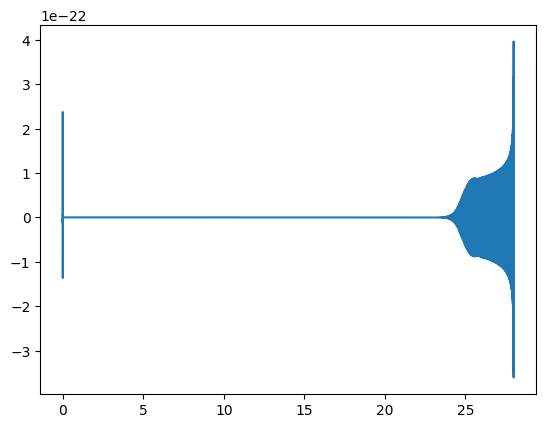

0
114688


In [ ]:
# generate waveform
from pycbc.waveform import get_td_waveform
m1, m2 = 32,8
d = 740
hp,_ = get_td_waveform(approximant="IMRPhenomD",
                       mass1 = m1,
                       mass2 = m2,
                       f_lower = 20,
                       delta_t = strain_list[i].delta_t,
                       distance = d)
hp.resize(len(strain_list[i]))
hp = hp.cyclic_time_shift(hp.start_time)
len(hp)
plt.plot(hp.sample_times, hp)
plt.show()
print(hp.start_time)
print(len(hp))

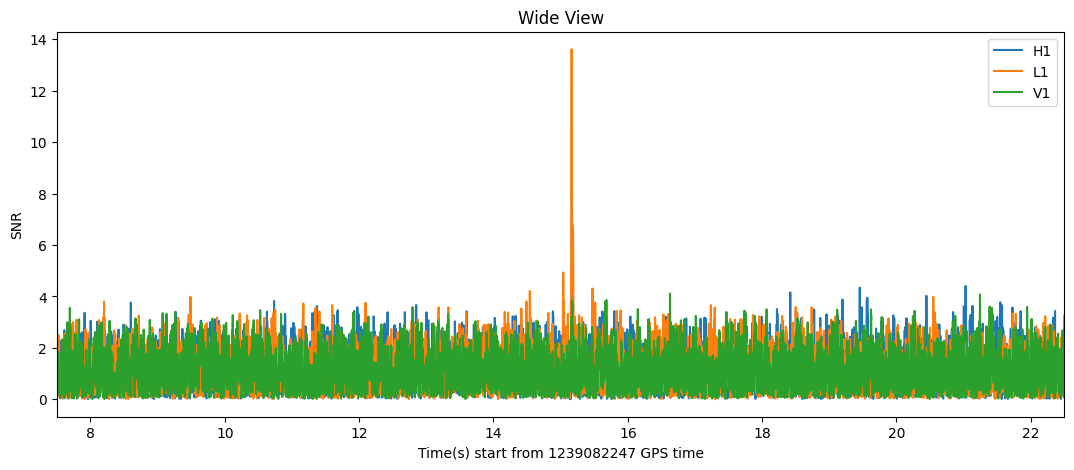

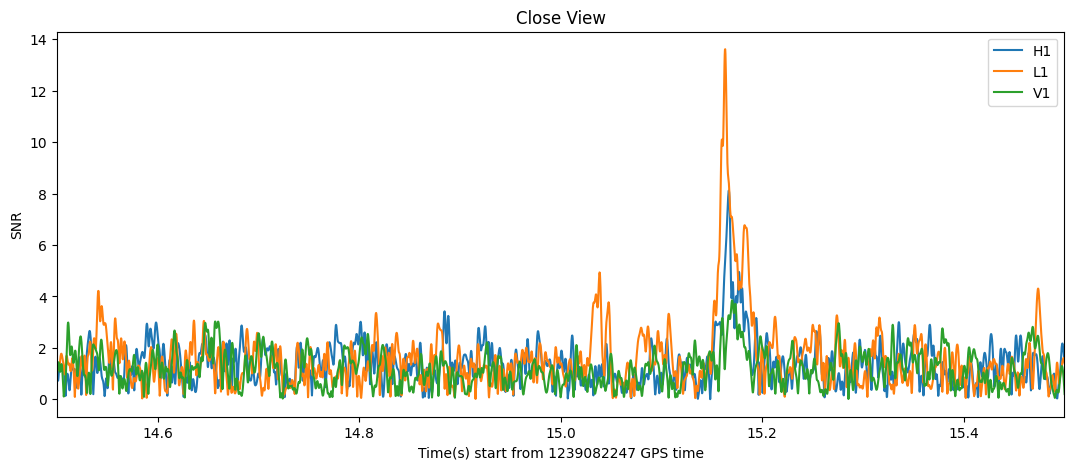

[37548, 37533, 43533]
Peak SNR :  [8.118690208428166, 13.612323908452812, 4.11228216451908]
Peak Time :  [15.1669921875, 15.163330078125, 16.628173828125]


In [ ]:
from pycbc.filter import matched_filter
snr=[]

for h, title in [(7.5, 'Wide View'),(14.5, 'Close View')]:
    plt.figure(figsize = (13,5))
    for i in range(3):
        snr.append(TimeSeries(
                              matched_filter(hp,
                                             strain_list[i],
                                             psd=psd[i],
                                             low_frequency_cutoff=45,
                                             ),
                              delta_t = 1/fs))
        snr[i] = abs(snr[i])
        snr[i] = snr[i].crop(2,2)
        plt.plot(snr[i].sample_times, snr[i], label=f'{list(ts.keys())[i]}')
    plt.xlabel(f'Time(s) start from {t0} GPS time')
    plt.ylabel('SNR')
    plt.title(title)
    plt.xlim((h ,30-h))
    plt.legend()
    plt.show()

peak_id = []
peak_v = []
peak_t = []
for i in range(3):
    peak_id.append(np.array(snr[i]).argmax())
    peak_v.append(snr[i][peak_id[i]])
    peak_t.append(snr[i].sample_times[peak_id[i]])
print(peak_id)
print('Peak SNR : ', peak_v)
print('Peak Time : ', peak_t)

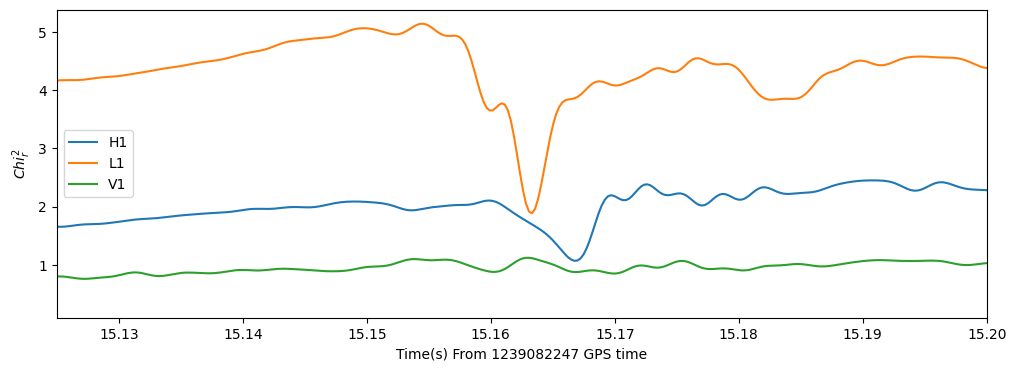

In [ ]:
# WARNING!! If you are having problems with this code, replace the import with
#from pycbc_chisq import power_chisq
from pycbc.vetoes import power_chisq

chisq = []
plt.figure(figsize=(12,4))
for i in range(3):
    # The number of bins to use. In principle, this choice is arbitrary. In practice,
    # this is empirically tuned.
    nbins = 26
    chisq.append(TimeSeries(power_chisq(hp,
                                        strain_list[i],
                                        nbins,
                                        psd[i],
                                        low_frequency_cutoff=45.0),
                            delta_t = 1/fs))
    chisq[i] = chisq[i].crop(5, 4)

    dof = nbins * 2 - 2
    chisq[i] /= dof

    plt.plot(chisq[i].sample_times, chisq[i], label =f'{list(ts.keys())[i]}')
plt.xlim((15.125,15.2))
plt.xlabel(f'Time(s) From {t0} GPS time')
plt.ylabel('$Chi^2_r$')
plt.legend()
plt.show()

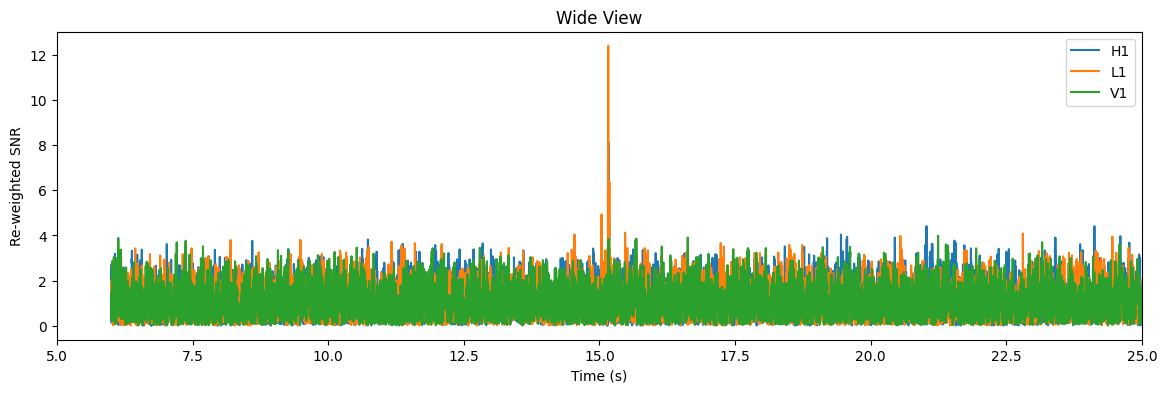

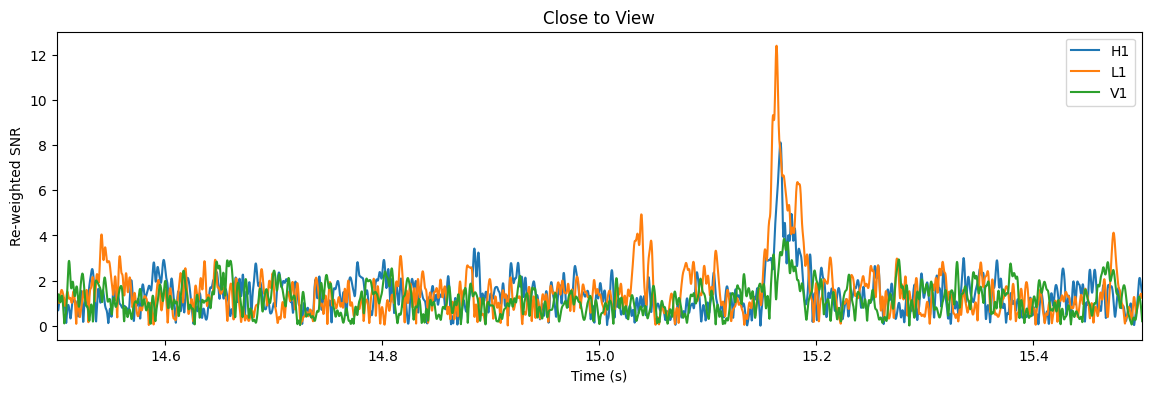

[37548, 37533, 62435]
Peak SNR :  [8.118690208428166, 12.402241568211862, 3.9106985832299066]
Peak Time :  [15.1669921875, 15.163330078125, 16.628173828125]


In [ ]:
from pycbc.events.ranking import newsnr

# The rho-hat term above is named "newsnr" here
nsnr =[]
for i in range(3):
    nsnr.append(TimeSeries(newsnr(snr[i], chisq[i]),delta_t= 1/fs))

# Show a couple sizes
for j, title in [(5, 'Wide View'), (14.5, 'Close to View')]:
    plt.figure(figsize=[14, 4])
    for i in range(3):
        plt.plot(snr[i].sample_times, nsnr[i], label=f'{list(ts.keys())[i]}')

    plt.legend()
    plt.title(title)
    plt.xlim( j, 30-j)
    plt.xlabel('Time (s)')
    plt.ylabel('Re-weighted SNR')
    plt.show()

npeak_id = []
npeak_v = []
npeak_t = []
for i in range(3):
    npeak_id.append(np.array(nsnr[i]).argmax())
    npeak_v.append(nsnr[i][peak_id[i]])
    npeak_t.append(snr[i].sample_times[peak_id[i]])
print(npeak_id)
print('Peak SNR : ', npeak_v)
print('Peak Time : ', npeak_t)

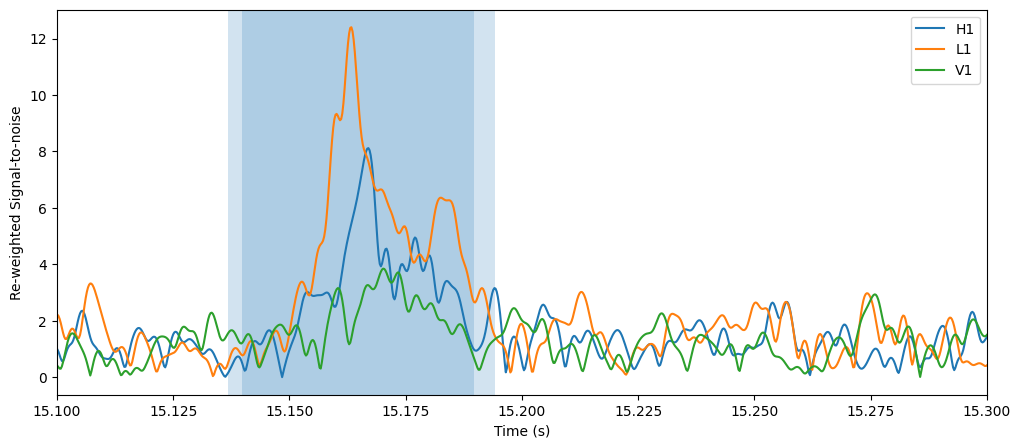

Virgo Peak has a re-weighted SNR value of 3.849480514336677
New Peak Time :  [15.1669921875, 15.163330078125, 15.170166015625]


In [ ]:
import numpy
from pycbc.detector import Detector

# Calculate the time of flight between the Virgo detectors and each LIGO observatory
D = Detector("V1")
tof = []
tof.append(D.light_travel_time_to_detector(Detector("H1")))
tof.append(D.light_travel_time_to_detector(Detector("L1")))
tof.append(0)
# Record the time of the peak in the LIGO observatories
plt.figure(figsize=[12, 5])
for i in range(3):

    # shade the region around each LIGO peak that could have a peak in Virgo if from
    # an astrophysical source
    if i != 3:
        npeak_t[i] = snr[i].sample_times[np.array(nsnr[i]).argmax()]
        plt.axvspan(npeak_t[i] - tof[i], npeak_t[i] + tof[i], alpha=0.2, lw=10)

    plt.plot(snr[i].sample_times, nsnr[i], label=f'{list(ts.keys())[i]}')

# Calculate the span of time that a Virgo peak could in principle happen in from time of flight
# considerations.
start = npeak_t[0] - tof[0]
end = npeak_t[1] + tof[1]

# convert the times to indices along with how large the region is in number of samples
window_size = int((end - start) * snr[2].sample_rate)
sidx = int((start - snr[2].start_time) * snr[2].sample_rate)
eidx = sidx + window_size

# Calculate the "on-source" peak re-weighted (newsnr) statistic value.
onsource = nsnr[2].data[sidx:eidx].max()
npeak_id[2] = nsnr[2].data[sidx:eidx].argmax() + sidx
npeak_t[2] = snr[2].sample_times[npeak_id[2]]

plt.legend()
plt.xlim(15.1, 15.3)
plt.xlabel('Time (s)')
plt.ylabel('Re-weighted Signal-to-noise')
plt.show()

print('Virgo Peak has a re-weighted SNR value of {}'.format(onsource))

print('New Peak Time : ', npeak_t)

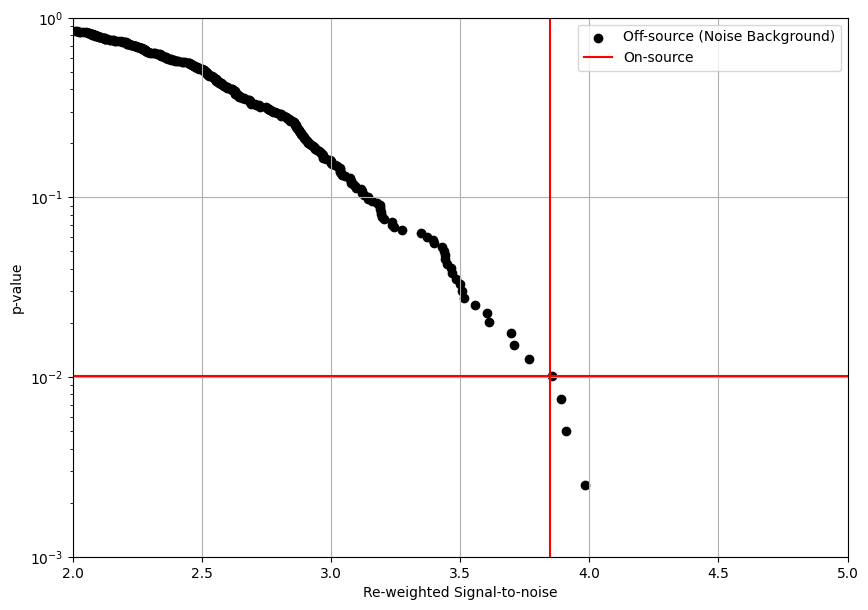

The p-value associated with the GW190412 peak is 0.010075566750629723


In [ ]:

# Now that we've calculated the onsource peak, we should calculate the background peak values.
# We do this by chopping up the time series into chunks that are the same size as our
# on-source window and repeating the same peak finding (max) procedure - keeping the algorithm
# the same to prevent bias

# Walk through the data in chunks and calculate the peak statistic value in each.
peaks = []
i = 0
while i + window_size < len(nsnr[2]):
    p = nsnr[2][i:i+window_size].max()
    peaks.append(p)
    i += window_size

    # Skip past the onsource time
    if abs(i - sidx) < window_size:
        i += window_size * 2

peaks = np.array(peaks)
# The p-value is just the number of samples observed in the background with a
# value equal or higher than the onsource divided by the number of samples.
# We can make the mapping between statistic value and p-value using our background
# samples.
pcurve = np.arange(1, len(peaks)+1)[::-1] / float(len(peaks))
peaks.sort()

pvalue = (peaks > onsource).sum() / float(len(peaks))

plt.figure(figsize=[10, 7])
plt.scatter(peaks, pcurve, label='Off-source (Noise Background)', color='black')

plt.axvline(onsource, label='On-source', color='red')
plt.axhline(pvalue, color='red')

plt.legend()
plt.yscale('log')
plt.grid()
plt.ylim(1e-3, 1e0)
plt.ylabel('p-value')
plt.xlabel('Re-weighted Signal-to-noise')

plt.xlim(2, 5)
plt.show()

print("The p-value associated with the GW190412 peak is {}".format(pvalue))

#Parameter estimation with Bayesian inference

## Get the data

In [ ]:
H1 = bilby.gw.detector.get_empty_interferometer("H1")
L1 = bilby.gw.detector.get_empty_interferometer("L1")

In [ ]:
strain_list = {'H1': H1_strain, 'L1':L1_strain, 'V1':V1_strain}
detect_list = list(strain_list.keys())
for i in range(3):
    strain_list[detect_list[i]]=ts(strain_list[detect_list[i]],sample_rate=4096,t0= 1239082247,name=f"{detect_list[i]} strain",channel=f'{detect_list[i]}')
    strain_list[detect_list[i]].plot()

In [ ]:
H1_strain = ts(H1_strain[t1:tn],sample_rate=4096,t0= 1239082247,name='H1 Strain',channel='H1')
L1_strain = ts(L1_strain[t1:tn],sample_rate=4096,t0= 1239082247,name='L1 Strain',channel='L1')
plt.figure(figsize=(12,4))
H1_strain.plot()
L1_strain.plot()
plt.show()

1.0

In [ ]:
H1.set_strain_data_from_gwpy_timeseries(H1_strain)
L1.set_strain_data_from_gwpy_timeseries(L1_strain)

##Get the PSD

In [ ]:
psd_alpha = 2 * H1.strain_data.roll_off / 4
H1_psd = H1_strain.psd(fftlength=4, overlap=0, window=("tukey", psd_alpha), method="median")
L1_psd = L1_strain.psd(fftlength=4, overlap=0, window=("tukey", psd_alpha), method="median")

In [ ]:
H1.power_spectral_density = bilby.gw.detector.PowerSpectralDensity(
    frequency_array=H1_psd.frequencies.value, psd_array=H1_psd.value)
L1.power_spectral_density = bilby.gw.detector.PowerSpectralDensity(
    frequency_array=H1_psd.frequencies.value, psd_array=L1_psd.value)

##The Bayesian process

In [ ]:
#Create the prior


prior = bilby.core.prior.PriorDict()
prior['chirp_mass'] = Uniform(name='chirp_mass', minimum=30.0,maximum=32.5)
prior['mass_ratio'] = Uniform(name='mass_ratio', minimum=0.5, maximum=1)
prior['phase'] = Uniform(name="phase", minimum=0, maximum=2*np.pi)
prior['geocent_time'] = Uniform(name="geocent_time", minimum=time_of_event-0.1, maximum=time_of_event+0.1)
prior['a_1'] =  0.0
prior['a_2'] =  0.0
prior['tilt_1'] =  0.0
prior['tilt_2'] =  0.0
prior['phi_12'] =  0.0
prior['phi_jl'] =  0.0
prior['dec'] =  -1.2232
prior['ra'] =  2.19432
prior['theta_jn'] =  1.89694
prior['psi'] =  0.532268
prior['luminosity_distance'] = PowerLaw(alpha=2, name='luminosity_distance', minimum=50, maximum=2000, unit='Mpc', latex_label='$d_L$')

In [ ]:
#Create the likelihood


# First, put our "data" created above into a list of interferometers (the order is arbitrary)
interferometers = [H1, L1]

# Next create a dictionary of arguments which we pass into the LALSimulation waveform - we specify the waveform approximant here
waveform_arguments = dict(
    waveform_approximant='IMRPhenomXP', reference_frequency=100., catch_waveform_errors=True)

# Next, create a waveform_generator object. This wraps up some of the jobs of converting between parameters etc
waveform_generator = bilby.gw.WaveformGenerator(
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    waveform_arguments=waveform_arguments,
    parameter_conversion=convert_to_lal_binary_black_hole_parameters)

# Finally, create our likelihood, passing in what is needed to get going
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers, waveform_generator, priors=prior,
    time_marginalization=True, phase_marginalization=True, distance_marginalization=True)

# Signal Significancy

In [ ]:
from pycbc.filter import sigma
# The time, amplitude, and phase of the SNR peak tell us how to align
# our proposed signal with the data.

# Shift the template to the peak time
dt=[]
hp_list=[]

for i in range(3):
    dt.append(npeak_t[i] -strain_list[i].start_time)
    hp_list.append(hp.cyclic_time_shift(dt[i]))
    # scale the template so that it would have SNR 1 in this data
    #hp_list[i] /= sigma(hp_list[i], psd=psd[i], low_frequency_cutoff=20.0)
    # Scale the template amplitude and phase to the peak value
    #hp_list[i] = (hp_list[i].to_frequencyseries() * npeak_v[i]).to_timeseries()
    hp_list[i].start_time = strain_list[i].start_time

In [ ]:
hp_list[1].start_time

LIGOTimeGPS(2, 0)

In [ ]:
dt[1]

LIGOTimeGPS(13, 164062500)

In [ ]:

white_data = []
white_template=[]
for i in range(3):
    white_data.append((strain_list[i].to_frequencyseries() / psd[i]**0.5).to_timeseries())
    white_template.append((hp_list[i].to_frequencyseries() / psd[i]**0.5).to_timeseries())
    white_data[i] = white_data[i].highpass_fir(30., 512).lowpass_fir(300, 512)
    #white_template[i] = white_template[i].highpass_fir(30, 512).lowpass_fir(300, 512)

    # Select the time around the merger
    #white_data[i] = white_data[i].time_slice(npeak_t[i]-.2, npeak_t[i]+.1)
    #white_template[i] = white_template[i].time_slice(npeak_t[i]-.2, npeak_t[i]+.1)

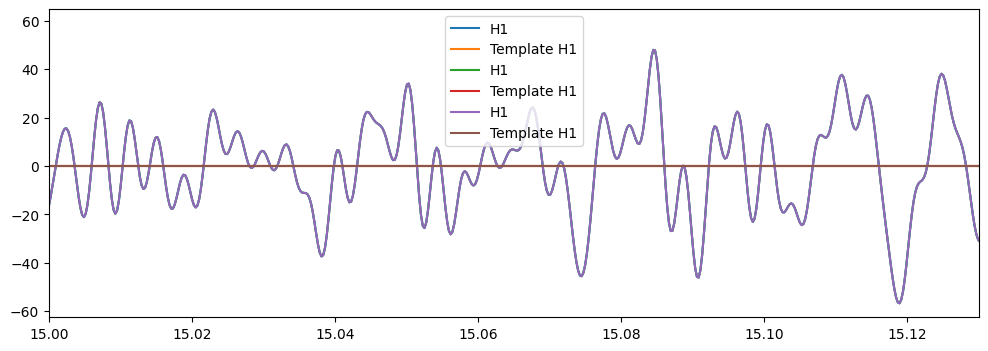

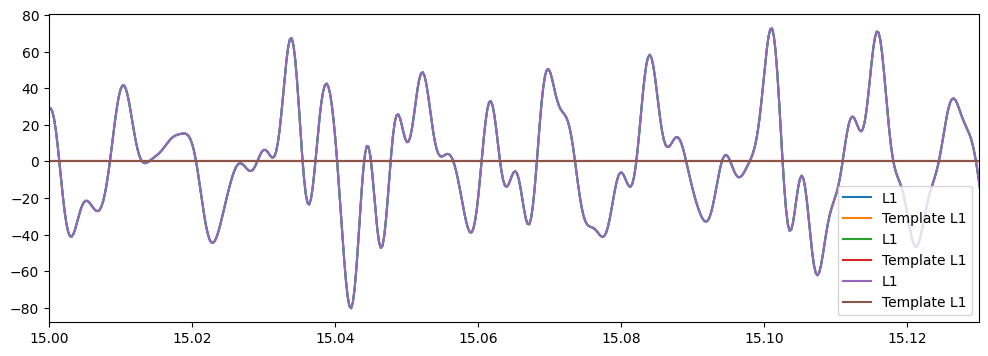

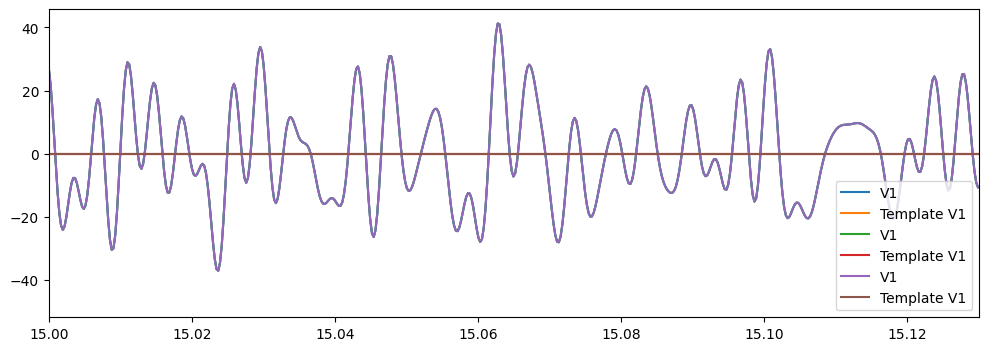

In [ ]:
for i in range(3):
    plt.figure(figsize=(12,4))
    for j in range(3):
        plt.plot(white_data[i].sample_times,white_data[i], label=f'{list(ts.keys())[i]}')
        plt.plot(white_template[j].sample_times, white_template[j],label=f'Template {list(ts.keys())[i]}')
    plt.xlim((15,15.13))
    plt.legend()
    plt.show()

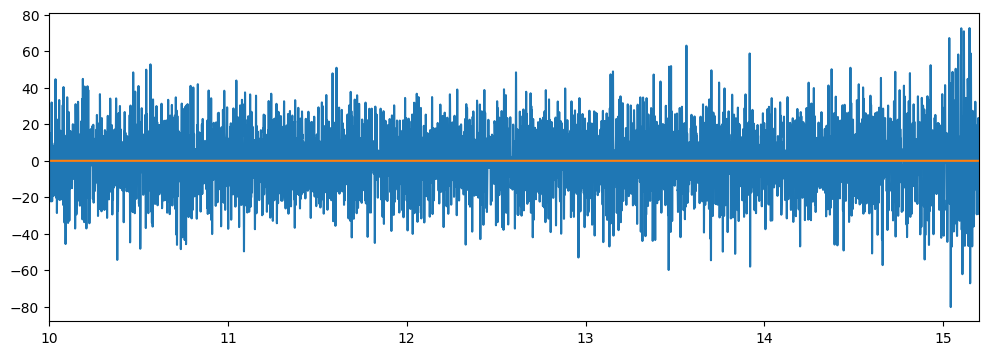

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(white_data[1].sample_times,white_data[1])
plt.plot(white_template[1].sample_times,white_template[1])
plt.xlim((10,15.2))
#plt.ylim((-30,30))
plt.show()

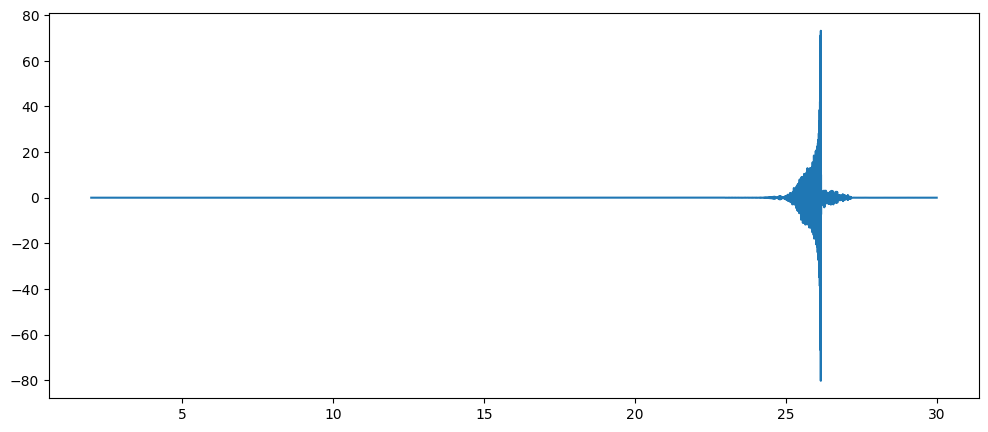

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(white_template[1].sample_times,white_template[1])
#plt.xlim((14.8,15.5))
plt.show()

# Convert into sound

In [ ]:
import soundfile as sf
y = H1_ts[t1:tn].bandpass(50,200).whiten()*1e19
y = y/np.max(np.abs(y))
H1_ts_wavfile = 'H1_ts.wav'
sf.write(H1_ts_wavfile, y, fs)

In [ ]:
from google.colab import files
files.download(H1_ts_wavfile)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
def log_prior_Ms(freq, alpha):
    """ Calculate the log prior under the Ms model

    Parameters
    ----------
    freq: array or float
        The frequency at which to calculate the prior
    alpha: array or float
        The alpha at which to calculate the prior

    Returns
    -------
    log_prior: array
        The log_prior calculated for all freq, alpha samples
    """
    # Convert freq, alpha to numpy arrays
    freq = np.atleast_1d(freq)
    alpha = np.atleast_1d(alpha)

    # Apply Uniform priors: calculate idxs of array where f, alpha in range
    f_min = 0
    f_max = 5
    f_idxs = (freq > f_min) * (freq < f_max)

    alpha_min = 0
    alpha_max = 1
    alpha_idxs = (alpha > alpha_min) * (alpha < alpha_max)

    idxs = alpha_idxs * f_idxs

    log_prior_volume = np.log(1/(f_max - f_min) * (1 / (alpha_max - alpha_min)))

    log_prior = np.zeros_like(freq)
    log_prior[idxs] = log_prior_volume
    log_prior[~idxs] = -np.inf
    return log_prior

In [ ]:

f = [8,8,8,0]
np.zeros_like(f)

array([0, 0, 0, 0])